<h1><center> MODELLING INVESTMENT STRATEGIES </center></h1>
<h2><center> DEEP EVOLUTION STRATEGIES </center></h2>

## 1. SOURCES

https://github.com/firmai/financial-machine-learning

https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW

**Da Silva, L (2019) `Evolving Deep Neural Networks`** , to be found at : https://towardsdatascience.com/evolving-deep-neural-networks-ceb8d135d74d

## 2. CREATING THE DATA FILE

In [1]:
## Further  recommendation, test multiple frameworks, see what works better on average. 
## Open source RL: https://docs.google.com/spreadsheets/d/1EeFPd-XIQ3mq_9snTlAZSsFY7Hbnmd7P5bbT8LPuMn0/edit#gid=0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sns.set()



D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()


D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,108.019997,106.809998,107.629997,107.949997,13578800.0,101.684258
1,2018-01-03,108.489998,107.480003,107.860001,108.059998,11901000.0,101.787872
2,2018-01-04,110.029999,108.199997,108.360001,109.040001,12953700.0,103.246048
3,2018-01-05,109.550003,107.779999,109.260002,108.339996,14155000.0,102.583244
4,2018-01-08,108.680000,107.699997,108.150002,108.500000,12466500.0,102.734734


In [3]:
df_full = pd.read_csv('JPM.csv')

## 3. DEEP EVOLUTIONARY NETWORKS

###  DRIVING CONCEPTS

Many of us have seen Deep learning accomplishing huge success in a variety of fields in recent years, with most of it coming from their ability to automate the frequently tedious and difficult feature engineering phase by learning “hierarchical feature extractors” from data . Also, as architecture design (i.e. the process of creating the shape and functionality of a neural network) happens to be a long and difficult process that has been mainly done manually, innovativeness is limited and most progress has come from old algorithms that have been performing remarkably well with nowadays computing resources and data . Another issue is that Deep Neural Networks are mainly optimized by gradient following algorithms (e.g. SGD, RMSProp), which are a great resource to constraint the search space but is susceptible to get trapped by local optima, saddle points and noisy gradients, especially in dense solution areas such as reinforcement learning.


As Deep Neural Networks (DNN) have become more successful, the demand for architecture engineering that allows better performance has been rising. With DNN increasing in complexity, the ability of humans to design them manually gets constrained and thus Neural Architecture Search (NAS) methods become more and more important. This problem gets particularly interesting when Sutton’s bitter lesson is taken into account:
The biggest lesson that can be read from 70 years of AI research is that general methods that leverage computation are ultimately the most effective, and by a large margin.

Evolutionary Algorithms (EA) have proven to be useful in this matter.

One might think of NAS as a three-dimensional process. 

> - The first dimension is their search space, which defines the possible architectures that may be represented by the algorithm. Naturally, a bigger search space implies more possible combinations to be tested. In order to make the problem solvable, some constraints are straightforwardly implemented on layers: A maximum number of layers is selected. They may only be connected in a chain (sequential) or multi-branch configuration. Building blocks of layers types are predefined, but their hyperparameters may be tuned.

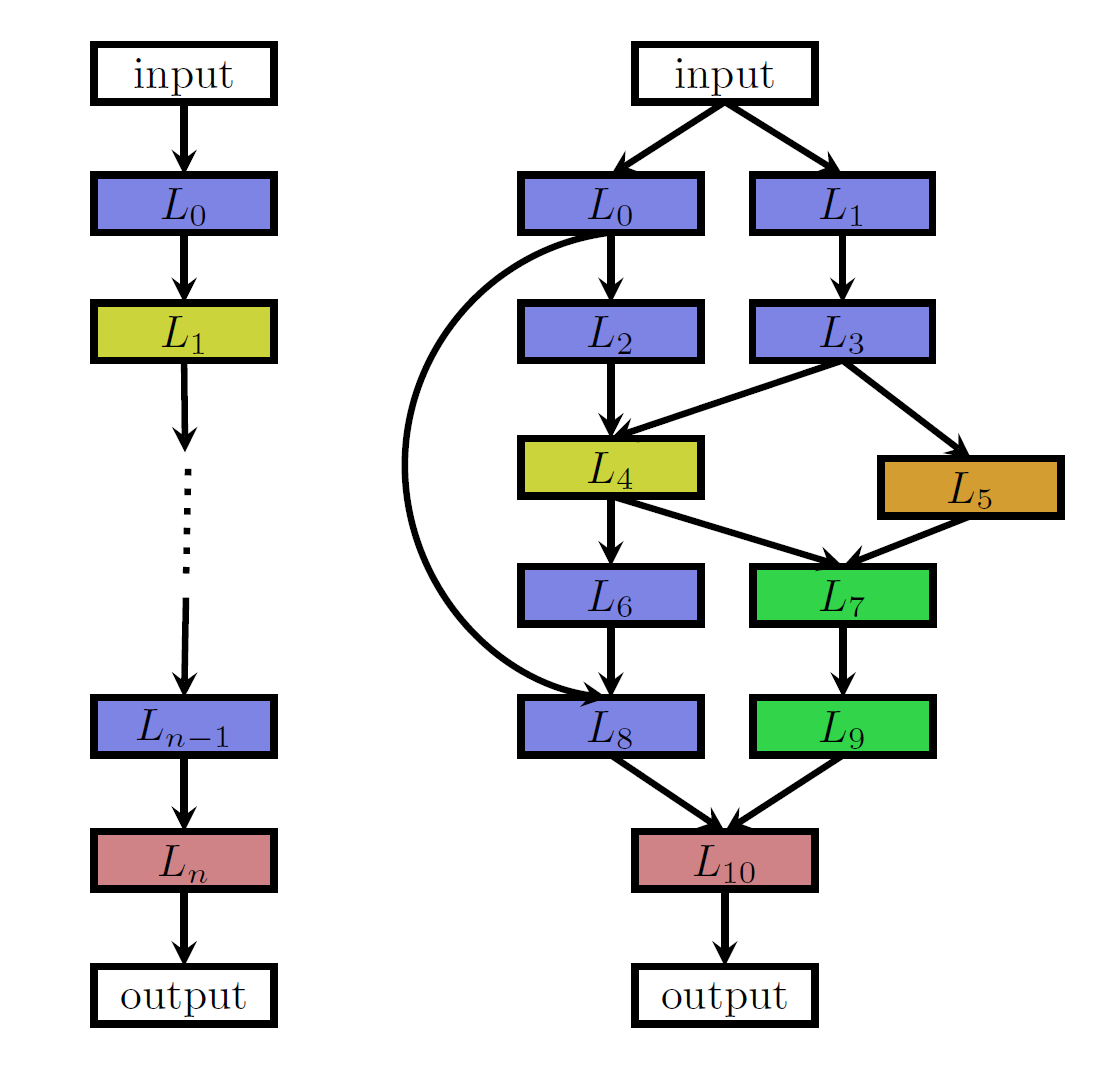

> - Next comes the search strategy, which defines how to explore the search space. Some common alternatives are Random Search, Bayesian Optimization, Reinforcement Learning, Gradient-based optimization and Neuro-evolutionary approaches. The first approach for evolutionary NAS comes from Miller et al. who used genetic approaches to propose architectures and backpropagation to optimize weights. Then, Stanley and Risto presented NeuroEvolution of Augmenting Topologies (NEAT), a Genetic Algorithm (GA) for evolving Artificial Neural Networks (ANN) that not only optimizes but also complexifies solutions by accounting for both fitness and diversity. More lately, Real et al. found that evolution performs equally well than Reinforcement Learning in terms of accuracy, but it developed better mid-time performance and smaller models (further description on this case is given below).

Even so, both genetic algorithms and DNN are known for demanding high resources, in the order of thousands of GPU days. Therefore, for NAS to be an affordable strategy, performance estimation has to be conducted on lower fidelities (i.e. less certainty, by using an approximation) than the actual performance. 

Some examples on this are, that uses an ANN to predict the performance of candidate networks, approximating the Pareto-optimal front, and, by implementing a performance estimation strategy in which an LSTM neural network is used to estimate the validation score of another candidate neural network given only a few epochs of training. Instead of doing estimation, some approaches have tried to keep the functionality of the neural network while changing its architecture and thus speeding up training. Auto-Keras has been built on this approach.


Applications of NAS to traditional neural network architectures has been researched in the last years producing a new state of the art result. To give some examples, Rawal et al. proposed a tree-based encoding of a DNN that is searched through genetic programming and improved LSTM performance on based standard language modelling (i.e. predicting next word in a large language corpus) by 0.9 perplexity points (i.e. the new model now better estimates the target language distribution). Also, on image classification, Real et al. evolve AmoebaNet-A to achieve 83.9% top-1, 96.6% top-5 ImageNet accuracy and thus establishing a new state of the art. It has been proposed that these results may be developed even further by taking advantage of diversity inherent in GA populations to amplify current ensembling methods and even encourage it explicitly, by directly rewarding ensembles into a population instead of direct models.

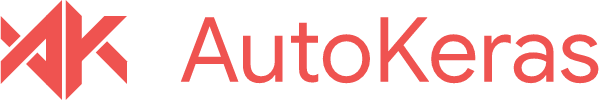

Neuroevolutionary algorithms may be split into those evolving both weights and architecture (e.g. NAS) and the ones that only try to optimize weights of a DNN. The combination of evolutionary algorithms with reinforcement learning generally comes as an only-weights implementation.

As in general gradient-based algorithms, such as Stochastic Gradient Descent (SGD) constraint exploration to gradient following, their search space becomes somewhat linear and local minima becomes a problem [1]. Furthermore, with Deep Reinforcement Learning (Deep RL) two extra issues arise: it is difficult to associate an action with a return when rewards are sparse, prematurely converging to local optima (i.e. they only happen after a series of decisions have been taken, also known as temporal credit assignment) [14] and they are very sensitive to hyperparameter selection [3].

Genetic Algorithms has been proposed as a workaround these issues in DRL. Such et al. [13] evolve the weights of a DNN with a gradient-free population-based GA and finds that it did well on hard Deep RL problems like Atari and Humanoid locomotion. By comparing their results with also a Random Search (RS), they find that GA always outperforms RS, and RS sometimes outperforms RL, suggesting that local optima, saddle points and noisy gradients are impeding the progress of gradient-based methods and that densely sampling in a region around the origin is, in some cases, sufficient to outperform gradient-based methods. They also find GA to develop substantially faster in wall-clock speed than Q-learning.

Such et al. [13] also point out that an unknown question is whether a hybrid approach that uses GA sampling in the early stages and then switching to gradient search will allow better and faster results. This is exactly what Khadka et al. [6] present with Evolutionary Reinforcement Learning (ERL), a hybrid algorithm that uses a population from an EA to train an RL agent and reinserts the agent in the population for fitness evaluation. They present GA as a good alternative to solve before mentioned Deep RL issues, but that also struggles to optimize a large number of parameters. Therefore, exploratory and temporal credit assignment ability of GA are combined with gradients from Deep RL to enable faster learning. Thus, Evolutionary RL is able to solve more tasks than, for example, Deep Deterministic Policy Gradient (DDPG) and faster than simple GA.

Practical studies like [6] and [9] have proven Evolutionary Deep Learning applications to be a useful method for advancing the state of the art. Nevertheless, lots of limitations are still present in employed methods, just like the use of predefined building blocks for NAS and non-crossover nor mutation used in ERL. Also, it is noticeable that EAs are seen as black-box optimization methods and thus they provide little understanding of why the performance is high.
Further research will decide the future of EAs in Deep Learning, but so far it seems that they are coming to stay and become an essential tool for solving specific learning problems, at least in the middle/long term.

## 4.  DEEP EVOLUTION AGENT

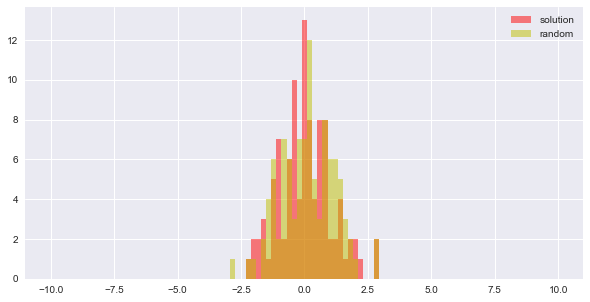

iter 1000. w: 0.7945617060366326, solution: 1.3732662064069734, reward: -36.817704
iter 2000. w: 1.3883476310739775, solution: 1.3732662064069734, reward: -0.006056
iter 3000. w: 1.3729840452543918, solution: 1.3732662064069734, reward: -0.008243
iter 4000. w: 1.3694037909441665, solution: 1.3732662064069734, reward: -0.007895
iter 5000. w: 1.3750746044578301, solution: 1.3732662064069734, reward: -0.007078


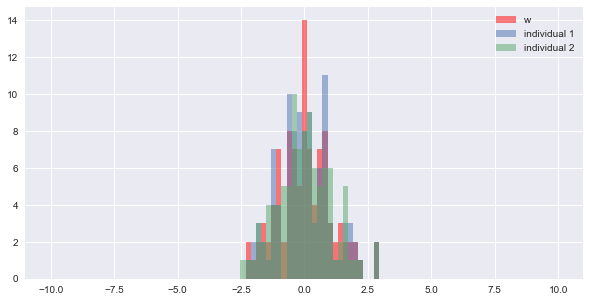

iter 10. reward: 18.698903
iter 20. reward: 19.102502
iter 30. reward: 41.217004
iter 40. reward: 40.348502
iter 50. reward: 42.694803
iter 60. reward: 41.097303
iter 70. reward: 42.418503
iter 80. reward: 45.155803
iter 90. reward: 47.294100
iter 100. reward: 46.113702
iter 110. reward: 49.104503
iter 120. reward: 46.833801
iter 130. reward: 49.258300
iter 140. reward: 47.549802
iter 150. reward: 47.436901
iter 160. reward: 50.917200
iter 170. reward: 49.719901
iter 180. reward: 51.097801
iter 190. reward: 47.244601
iter 200. reward: 48.689201
iter 210. reward: 46.906600
iter 220. reward: 48.755099
iter 230. reward: 49.747498
iter 240. reward: 53.302098
iter 250. reward: 51.675399
iter 260. reward: 53.522299
iter 270. reward: 54.789200
iter 280. reward: 55.726100
iter 290. reward: 56.392099
iter 300. reward: 56.263499
iter 310. reward: 54.608299
iter 320. reward: 54.241198
iter 330. reward: 49.844799
iter 340. reward: 53.787299
iter 350. reward: 54.915899
iter 360. reward: 56.245499
i

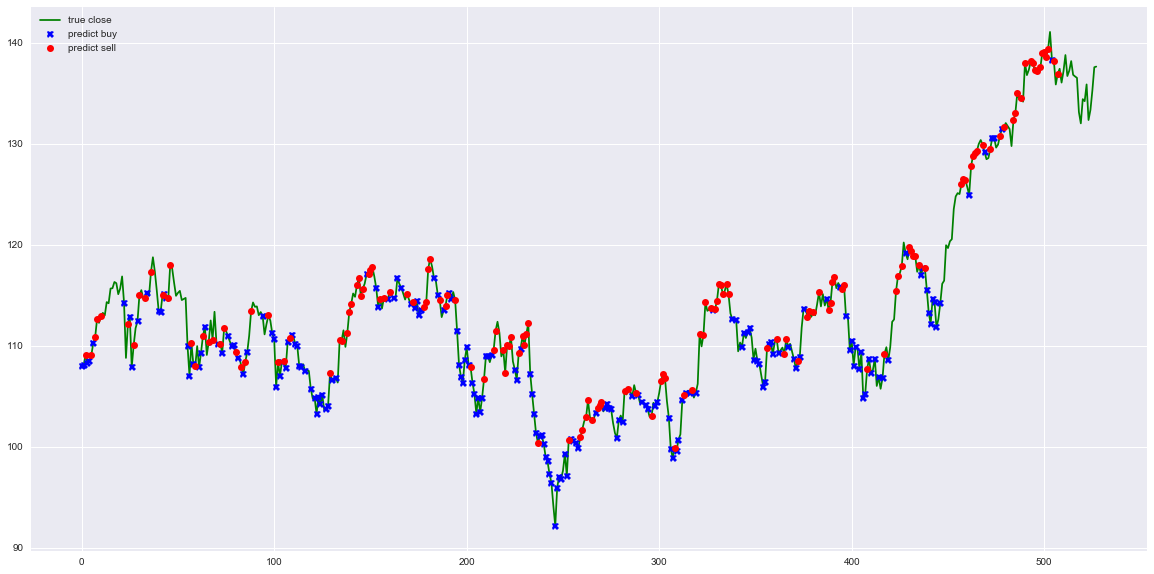

In [49]:
## Deep Evolution Strategy

plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

df= df_full.copy()
name = 'Deep Evolution Strategy'

def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

close = df.Close.values.tolist()
get_state(close, 0, 10)

get_state(close, 1, 10)

get_state(close, 2, 10)

class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

window_size = 30
model = Model(window_size, 500, 3)

initial_money = 10000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.savefig('output/'+name+'.png')
        plt.show()

model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 5,
    max_sell = 5,
    close = close,
    window_size = window_size,
    skip = 1,
)

agent.fit(iterations = 500, checkpoint = 10)

agent.buy()